In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Movies on 50's and 60's made more revenue than movies nowadays (00's and 10's)

- **H0** = No difference between revenue of movies between 50's/60's and movies nowadays (00's/10's 
- **H1** = There is a difference 

In [2]:
data_with_inflation = pd.read_csv('data_adjusted_to_inflation.csv')
data_for_ht = data_with_inflation.replace(0,data_with_inflation.median())

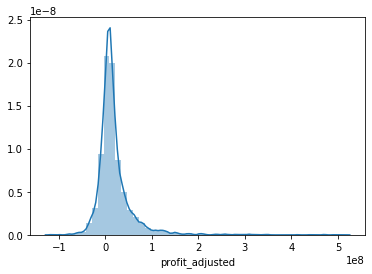

In [3]:
sns.distplot(data_for_ht.profit_adjusted)

In [93]:
fifth_movies_profit_adjusted = np.array(data_for_ht[(data_for_ht['decade'] == "50s")|(data_for_ht['decade'] == "60s")]['profit_adjusted'])
now_movies_profit_adjusted = np.array(data_for_ht[(data_for_ht['decade']== "00s")|(data_for_ht['decade'] == "10s")]['profit_adjusted'])

In [79]:
# romance_movies_profit_adjusted

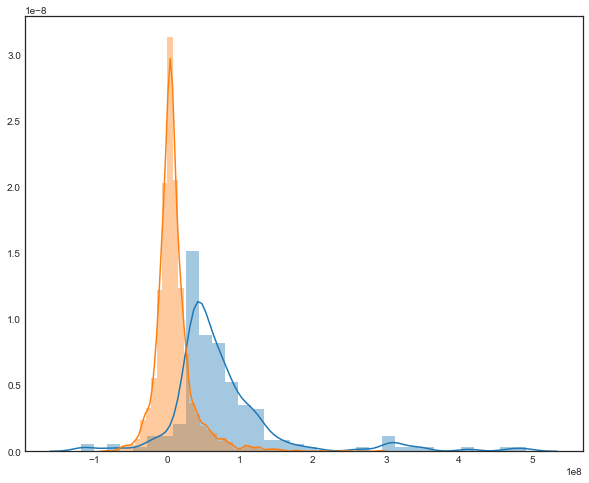

In [80]:
plt.figure(figsize=(10,8))

sns.distplot(fifth_movies_profit_adjusted)
sns.distplot(now_movies_profit_adjusted)


### Sampling samples

In [81]:
import random 

In [95]:
def samples_means(array, samples_wanted):
    sample_means = []
    for i in range(samples_wanted):
        sample_means.append(np.mean(random.sample(list(array), 35)))
    return sample_means

In [100]:
fiv_sample_means = samples_means(fifth_movies_profit_adjusted, 30)
now_sample_means = samples_means(now_movies_profit_adjusted, 30)

print(fiv_sample_means, now_sample_means)

[83267292.05455406, 52993045.194326915, 79225692.15354912, 69478911.66948044, 84131543.69618249, 75258686.81886673, 53313562.99921636, 76201193.97971997, 66394825.90139927, 96720818.8942533, 74868602.26218617, 97759977.01980671, 76034313.08115774, 87936978.57554209, 58469206.071762286, 76099200.67482428, 81266288.80626485, 109579491.42855796, 103745960.98805039, 85859668.40524527, 81008569.72815828, 60111094.99037885, 66015018.977894895, 86212718.06140521, 74148724.34042107, 66767594.55213162, 88051893.19556545, 68063704.9050997, 90203981.33724016, 69863889.760167] [5477969.41142022, 929849.5220083063, 658821.9685269635, 19827864.90110423, 14466195.270836962, 13657782.354890443, 11680860.659168258, 13429924.943113178, 5940407.504513244, 6676275.779582824, 11775601.25550282, 9733859.197535474, 10439085.652911872, 1495132.4180737648, 17457379.75853006, 4382610.9549860805, 18270466.490553897, 4574815.557124151, 8056414.234443539, 10714371.53450318, 12630092.350756356, 12415722.589918073, 

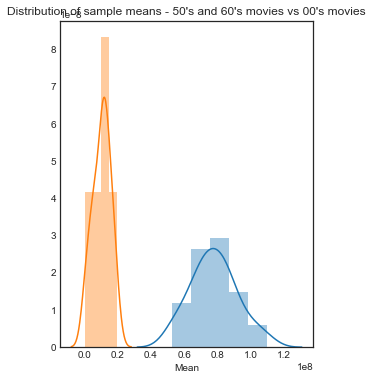

In [120]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(fiv_sample_means, axlabel='Mean')

# plt.subplot(1,2,2)
sns.distplot(now_sample_means)

plt.title("Distribution of sample means - 50's and 60's movies vs 00's movies")
plt.show()



In [114]:
# sns.distplot(now_sample_means)

### Back to the two "populations"

In [123]:
print("The mean for 50s movies is :",fifth_movies_profit_adjusted.mean())
print("The std for 50s movies is :",fifth_movies_profit_adjusted.std())
print("The var for 50s movies is :",fifth_movies_profit_adjusted.var())

print('=====================')

print("The mean for now movies is :",now_movies_profit_adjusted.mean())
print("The std for now movies is :",now_movies_profit_adjusted.std())
print("The var for now movies is :",now_movies_profit_adjusted.var())



The mean for 50s movies is : 76559381.44716212
The std for 50s movies is : 82982193.1145535
The var for 50s movies is : 6886044374101050.0
The mean for now movies is : 9618632.796179065
The std for now movies is : 27623106.735850368
The var for now movies is : 763036025740182.0


### Welch t-test

In [127]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

print('Wlech T-test is: {}'.format(welch_t(fifth_movies_profit_adjusted, now_movies_profit_adjusted)))

Wlech T-test is: 11.071194499940479


### Degrees of freedom

In [128]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

print('Wlech degrees of freedom are: {}'.format(welch_df(fifth_movies_profit_adjusted, now_movies_profit_adjusted)))

Wlech degrees of freedom are: 193.3316231895007


In [131]:
t = welch_t(fifth_movies_profit_adjusted, now_movies_profit_adjusted)
df = welch_df(fifth_movies_profit_adjusted, now_movies_profit_adjusted)

### Convert to p-value

In [129]:
import scipy.stats as stats

In [133]:
p = 1 - float(stats.t.cdf(t, df))
print(p)

0.0


### Cohen's d test

In [149]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [150]:
Cohen_d(fifth_movies_profit_adjusted, now_movies_profit_adjusted)

1.9225664152448578

# Movies nowadays have higher budget than movies on 50's and 60's

- **H0**= No difference between budgets of movies between 50's/60's and movies nowadays (00's/10's)
- **H1**= There is a difference

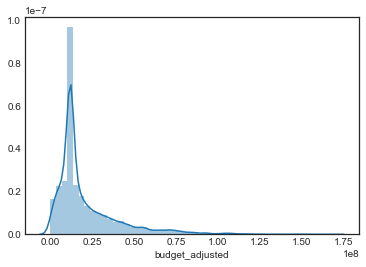

In [135]:
sns.distplot(data_for_ht.budget_adjusted)

In [136]:
fifth_movies_budget_adjusted = np.array(data_for_ht[(data_for_ht['decade'] == "50s")|(data_for_ht['decade'] == "60s")]['budget_adjusted'])
now_movies_budget_adjusted = np.array(data_for_ht[(data_for_ht['decade']== "00s")|(data_for_ht['decade'] == "10s")]['budget_adjusted'])

In [79]:
# romance_movies_profit_adjusted

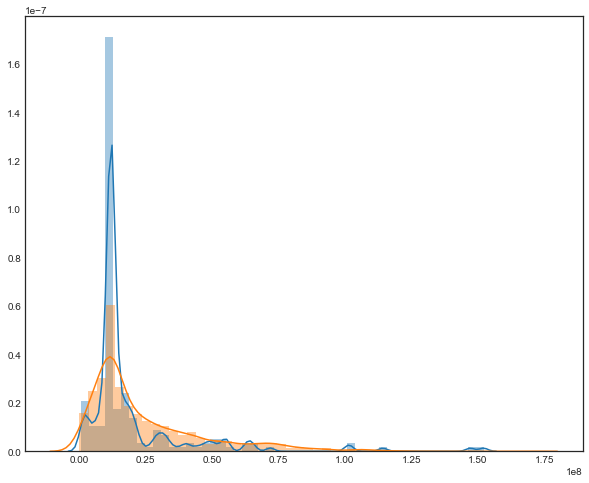

In [137]:
plt.figure(figsize=(10,8))

sns.distplot(fifth_movies_budget_adjusted)
sns.distplot(now_movies_budget_adjusted)


### Sampling samples

In [138]:
import random 

In [139]:
def samples_means(array, samples_wanted):
    sample_means = []
    for i in range(samples_wanted):
        sample_means.append(np.mean(random.sample(list(array), 35)))
    return sample_means

In [140]:
fiv_sample_means = samples_means(fifth_movies_budget_adjusted, 30)
now_sample_means = samples_means(now_movies_budget_adjusted, 30)

print(fiv_sample_means, now_sample_means)

[15563712.078655342, 23705451.578523375, 13804403.999428477, 19914732.725604787, 16510810.449286962, 17337791.552608766, 21377608.025354855, 21489377.090056166, 21645768.43735684, 16823703.25999428, 22742371.076568425, 26637811.391917057, 24871878.05320133, 20450829.351512186, 15706436.647317816, 27651914.077127036, 22989284.957364313, 12693796.128343994, 18413745.675875153, 19568806.96093204, 18272793.988862507, 18965824.537820846, 23691134.65356184, 16746408.79108574, 18343552.177304555, 19668020.02379111, 20968612.71318394, 22459468.187669758, 23806913.67278293, 27533368.514050763] [20807795.186998807, 30133551.75612117, 26094215.931774516, 31894442.28239819, 26923953.134150326, 20003556.547882993, 24641853.925075985, 31841733.61372139, 21496384.319722038, 20941448.21714195, 24061450.874170367, 27810102.85292392, 21957812.013579864, 19260001.049754992, 29407750.549117718, 20378980.914415807, 23964318.425228115, 27537550.840773407, 25559590.71345003, 27156534.49473546, 26139100.29793

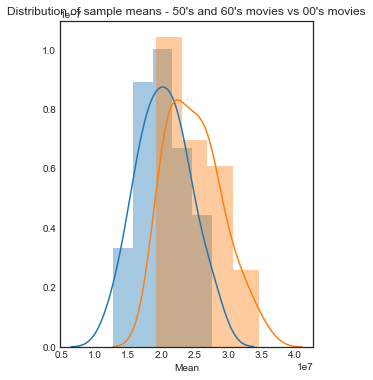

In [141]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(fiv_sample_means, axlabel='Mean')

# plt.subplot(1,2,2)
sns.distplot(now_sample_means)

plt.title("Distribution of sample means - 50's and 60's movies vs 00's movies")
plt.show()



In [114]:
# sns.distplot(now_sample_means)

### Back to the two "populations"

In [142]:
print("The mean for 50s movies is :",fifth_movies_budget_adjusted.mean())
print("The std for 50s movies is :",fifth_movies_budget_adjusted.std())
print("The var for 50s movies is :",fifth_movies_budget_adjusted.var())

print('=====================')

print("The mean for now movies is :",now_movies_budget_adjusted.mean())
print("The std for now movies is :",now_movies_budget_adjusted.std())
print("The var for now movies is :",now_movies_budget_adjusted.var())



The mean for 50s movies is : 19764124.990171283
The std for 50s movies is : 21891245.965123907
The var for 50s movies is : 479226649905553.75
The mean for now movies is : 24423378.743268598
The std for now movies is : 22223271.86481622
The var for now movies is : 493873812377532.06


### Welch t-test

In [143]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

print('Wlech T-test is: {}'.format(welch_t(fifth_movies_budget_adjusted, now_movies_budget_adjusted)))

Wlech T-test is: 2.821414107427349


### Degrees of freedom

In [145]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

print('Wlech degrees of freedom are: {}'.format(welch_df(fifth_movies_budget_adjusted, now_movies_budget_adjusted)))

Wlech degrees of freedom are: 221.99915543691014


In [147]:
t2 = welch_t(fifth_movies_budget_adjusted, now_movies_budget_adjusted)
df2 = welch_df(fifth_movies_budget_adjusted, now_movies_budget_adjusted)

### Convert to p-value

In [129]:
import scipy.stats as stats

In [148]:
p = 1 - float(stats.t.cdf(t2, df2))
print(p)

0.0026073484046530426


### Cohen's d test

In [152]:
Cohen_d(now_movies_budget_adjusted, fifth_movies_budget_adjusted)

0.2098850151504559